In [20]:
import pandas as pd
import numpy as np

np.random.seed(5)

In [5]:
isic_train_dataset = pd.read_csv("./datasets/ISIC_2019_Training_GroundTruth.csv")

In [6]:
isic_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   25331 non-null  object 
 1   MEL     25331 non-null  float64
 2   NV      25331 non-null  float64
 3   BCC     25331 non-null  float64
 4   AK      25331 non-null  float64
 5   BKL     25331 non-null  float64
 6   DF      25331 non-null  float64
 7   VASC    25331 non-null  float64
 8   SCC     25331 non-null  float64
 9   UNK     25331 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.9+ MB


In [8]:
isic_train_dataset.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
bins = isic_train_dataset.iloc[:, 1:].sum(axis=0)
bins

MEL      4522.0
NV      12875.0
BCC      3323.0
AK        867.0
BKL      2624.0
DF        239.0
VASC      253.0
SCC       628.0
UNK         0.0
dtype: float64

In [11]:
import matplotlib.pyplot as plt

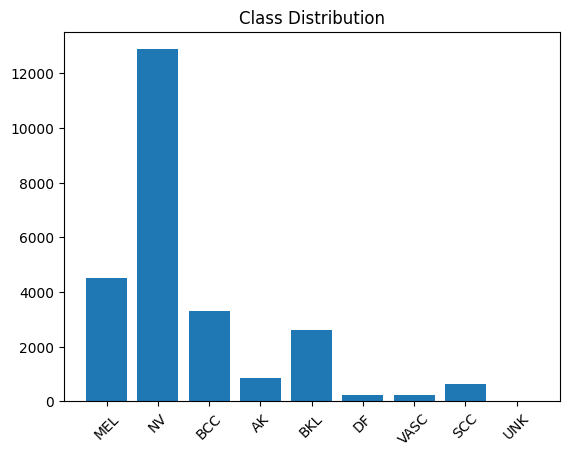

In [18]:
plt.bar(bins.index, bins.values)
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.show()

In [25]:
from PIL import Image

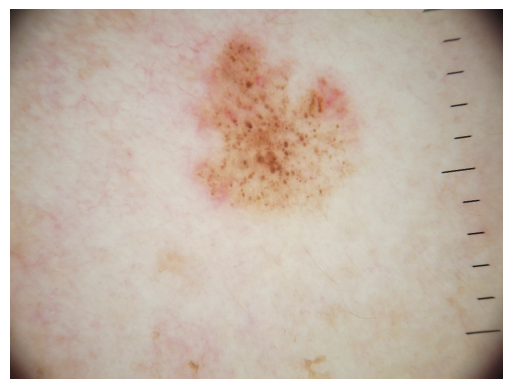

In [36]:
image = isic_train_dataset.iloc[np.random.randint(0, 1000), 0]
img = Image.open(f"./datasets/ISIC_2019_Training_Input/{image}.jpg")

plt.axis('off')
plt.imshow(img)
plt.show()

In [38]:
isic_train_dataset["label"] = isic_train_dataset.iloc[:, 1:].idxmax(axis=1)
isic_train_dataset.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,label
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL


In [65]:
grouped_by_label = isic_train_dataset.groupby("label")
random_imgs = []
for name, group in grouped_by_label:
    idx = np.random.randint(0, len(group))
    random_imgs.append(group.loc[group.index[idx], ['image', 'label']])

random_imgs

[image    ISIC_0065120
 label              AK
 Name: 20177, dtype: object,
 image    ISIC_0027146
 label             BCC
 Name: 5743, dtype: object,
 image    ISIC_0033691
 label             BKL
 Name: 12288, dtype: object,
 image    ISIC_0060890
 label              DF
 Name: 17558, dtype: object,
 image    ISIC_0067836
 label             MEL
 Name: 21901, dtype: object,
 image    ISIC_0072340
 label              NV
 Name: 24746, dtype: object,
 image    ISIC_0062362
 label             SCC
 Name: 18472, dtype: object,
 image    ISIC_0032890
 label            VASC
 Name: 11487, dtype: object]

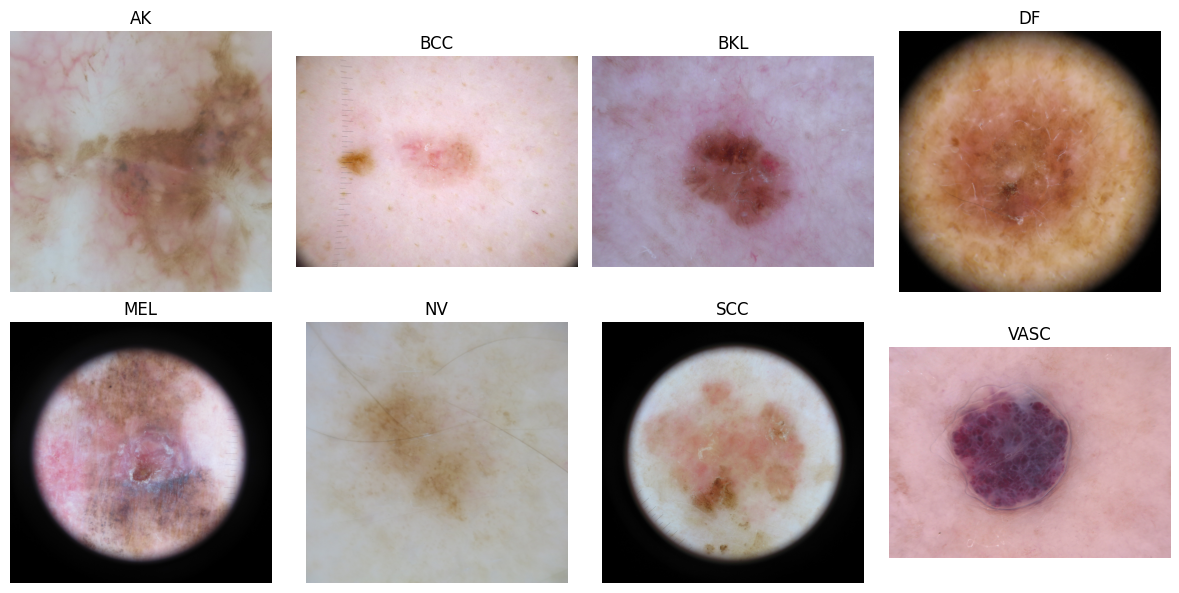

In [66]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

for ax, item in zip(axs.flat, random_imgs):
    
    image_path = f"./datasets/ISIC_2019_Training_Input/{item['image']}.jpg"
    img_data = Image.open(image_path)
    
    ax.imshow(img_data)
    ax.set_title(item['label'])
    ax.axis('off')

plt.tight_layout()
plt.show()